# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/survey.csv', delimiter=(';'))
df

,Survey,Label
0,Sangat baik dalam menjelaskan materi dan juga ...,positif
1,walaupun yang mengajar selalu asisten tetapi m...,positif
2,"Walaupun, Pelajaran ini merupakan kelas besar ...",negatif
3,sebaiknya tidak usah menyuruh maju satu persat...,negatif
4,"semoga lebih baik kedepannya,",positif
...,...,...
2874,"sudah sangat baik, sabar dan telaten dalam men...",positif
2875,sarannya lebih baik dijelaskan secara langsung...,negatif
2876,cara untuk mengajarnya lebih di tingkatkan kem...,positif
2877,"sangat bagus mendatangkan para narasumber hebat,",positif


# EDA

In [3]:
df.shape

(2879, 2)

In [4]:
df.columns

Index(['Survey', 'Label'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Survey  2879 non-null   object
 1   Label   2879 non-null   object
dtypes: object(2)
memory usage: 45.1+ KB


In [6]:
df['Label'].value_counts()

Label
positif    1792
negatif    1087
Name: count, dtype: int64

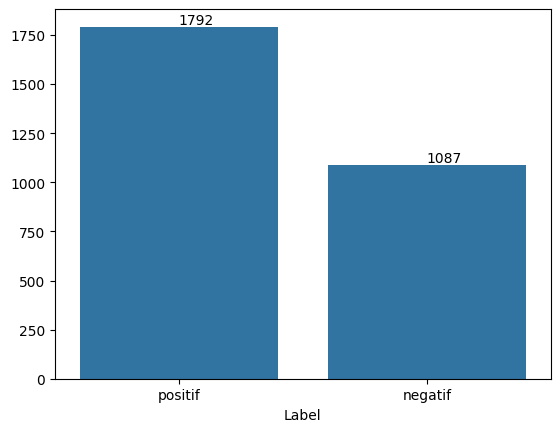

In [7]:
sns.barplot(
    x = df['Label'].value_counts().index,
    y = df['Label'].value_counts().values
)
for i in range(len(df['Label'].value_counts().index)):
    plt.text(i, df['Label'].value_counts().values[i], df['Label'].value_counts().values[i], va = "bottom" )

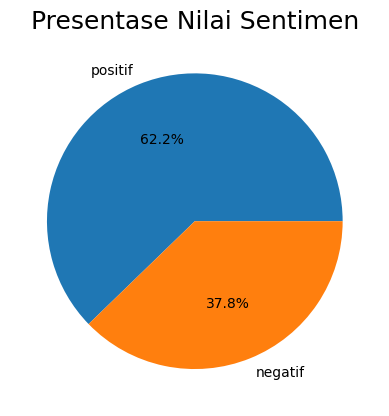

In [8]:
plt.pie(
    df['Label'].value_counts(),
    autopct= "%1.1f%%",
    labels= df['Label'].value_counts().index
)
plt.title("Presentase Nilai Sentimen", fontsize = 18)
plt.show()

In [9]:
df.duplicated().sum()

np.int64(58)

In [10]:
df.isnull().sum()

Survey    0
Label     0
dtype: int64

In [11]:
print(' '.join(df['Survey']))

Sangat baik dalam menjelaskan materi dan juga menyampikan tugas tugas, walaupun yang mengajar selalu asisten tetapi materi yang disampaikan sangat baik., Walaupun, Pelajaran ini merupakan kelas besar sebaiknya bisa diadakan offline dan online secara bergantian., sebaiknya tidak usah menyuruh maju satu persatu untuk mengerjakan soal cukup menyuruh anak yang mampu saja,karena ketika maju saat dipanggil saat tidak bisa memang diajarin caranya tapi terkesan memarahi.Saya kira saya sedang berada di sekolah bukan Pelajaran., semoga lebih baik kedepannya, Pelajaran dilaksanakan secara offline, Bismillah lancar, mungkin untuk guru pengampu pada mapel mtk semester ini untuk cara mengajarnya lebih disemangatkan lagi, dan sekiranya tidak ada halangan bisa on cam agar Siswa tidak boring padamapel tersebut, Saran untuk pembelajaran Pelajaran elektronika telekomunikasi adalah semoga semakin lebih baik lagi dalam menyampaikan materi, Gurunya asik, Saran bu, mungkin kedepannya jika menjelaskan materi 

# Preprocessing

In [12]:
## drop duplicated
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [14]:
import re

def cleaning(komen):
    komen = komen.lower()
    komen = re.sub(r'[^a-zA-Z\s]', '', komen)
    komen = re.sub(r'(.)\1{2,}', r'\1', komen)
    komen = re.sub(r'\b\w\b', '', komen)
    komen = re.sub(r'\s+', ' ', komen)
    return komen

df['Survey'] = df['Survey'].apply(cleaning)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\3952324161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(cleaning)


,Survey,Label
0,sangat baik dalam menjelaskan materi dan juga ...,positif
1,walaupun yang mengajar selalu asisten tetapi m...,positif
2,walaupun pelajaran ini merupakan kelas besar s...,negatif
3,sebaiknya tidak usah menyuruh maju satu persat...,negatif
4,semoga lebih baik kedepannya,positif
...,...,...
2874,sudah sangat baik sabar dan telaten dalam meng...,positif
2875,sarannya lebih baik dijelaskan secara langsung...,negatif
2876,cara untuk mengajarnya lebih di tingkatkan kem...,positif
2877,sangat bagus mendatangkan para narasumber hebat,positif


In [15]:
print(' '.join(df['Survey']))

sangat baik dalam menjelaskan materi dan juga menyampikan tugas tugas walaupun yang mengajar selalu asisten tetapi materi yang disampaikan sangat baik walaupun pelajaran ini merupakan kelas besar sebaiknya bisa diadakan offline dan online secara bergantian sebaiknya tidak usah menyuruh maju satu persatu untuk mengerjakan soal cukup menyuruh anak yang mampu sajakarena ketika maju saat dipanggil saat tidak bisa memang diajarin caranya tapi terkesan memarahisaya kira saya sedang berada di sekolah bukan pelajaran semoga lebih baik kedepannya pelajaran dilaksanakan secara offline bismillah lancar mungkin untuk guru pengampu pada mapel mtk semester ini untuk cara mengajarnya lebih disemangatkan lagi dan sekiranya tidak ada halangan bisa on cam agar siswa tidak boring padamapel tersebut saran untuk pembelajaran pelajaran elektronika telekomunikasi adalah semoga semakin lebih baik lagi dalam menyampaikan materi gurunya asik saran bu mungkin kedepannya jika menjelaskan materi bisa improf dan di

## Tokenize

In [16]:
from nltk.tokenize import word_tokenize
def tokenize(komen):
    return word_tokenize(komen)

df['Survey'] = df['Survey'].apply(tokenize)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\692889726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(tokenize)


,Survey,Label
0,"[sangat, baik, dalam, menjelaskan, materi, dan...",positif
1,"[walaupun, yang, mengajar, selalu, asisten, te...",positif
2,"[walaupun, pelajaran, ini, merupakan, kelas, b...",negatif
3,"[sebaiknya, tidak, usah, menyuruh, maju, satu,...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sudah, sangat, baik, sabar, dan, telaten, dal...",positif
2875,"[sarannya, lebih, baik, dijelaskan, secara, la...",negatif
2876,"[cara, untuk, mengajarnya, lebih, di, tingkatk...",positif
2877,"[sangat, bagus, mendatangkan, para, narasumber...",positif


## Stopword remove

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
kecuali = ['baik', 'buruk', 'bagus', 'jelek', 'yang', 'sejauh', 'ini', 'belum', 'ada', 'cukup', 'untuk', 'saat', 'ini', 'tidak', 'ada', 'belum', 'sangat', 'kurang']
stopstop = [word for word in stopword if word not in kecuali]


def filtering(komen):
    komen = [word for word in komen if word not in stopstop]
    return komen

df['Survey'] = df['Survey'].apply(filtering)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\3166120581.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(filtering)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, yang, mengajar, selalu, asisten, ma...",positif
2,"[walaupun, pelajaran, ini, merupakan, kelas, b...",negatif
3,"[sebaiknya, tidak, usah, menyuruh, maju, satu,...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, telaten, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, untuk, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


## Normalisasi

In [18]:
# # mengambil kata pada dataset
# def ambil(df, kolom):
#     frekuensi = {}
#     for row in df[kolom]:
#         for token in row:
#             if token in frekuensi:
#                 frekuensi[token] += 1
#             else:
#                 frekuensi[token] = 1
#     kata = {token : frekuensi[token] for token in frekuensi if frekuensi[token] > 1}
#     return kata

# list_kata = ambil(df, 'Survey')
# print(len(list_kata))
# print(list_kata)

In [19]:
# # pembenaran kata
# kamus = {'kata':[], 'pembenaran':[]}

# for i, token in enumerate(list_kata):
#     jawaban = input(f'{i} masukkan pembenaran untuk kata {token}:')
#     if jawaban != '':
#         kamus['kata'].append(token)
#         kamus['pembenaran'].append(jawaban)
#     if jawaban == 'stop':
#         break

In [20]:
# # mengubah format ke dict
# kamus_kata = dict(zip(kamus['kata'], kamus['pembenaran']))

In [21]:
# import joblib
# joblib.dump(kamus_kata, 'kamus23223.txt')

In [26]:
# kamus update
import joblib
kamus_kata = joblib.load('kamus2.pkl')

In [27]:
# menerapkan ke dataset
def normalisasi(komen):
    komen = [kamus_kata.get(word, word) for word in komen]
    return komen

df['Survey'] = df['Survey'].apply(normalisasi)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\1920141250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(normalisasi)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, yang, mengajar, selalu, asisten, ma...",positif
2,"[walaupun, pelajaran, ini, merupakan, kelas, b...",negatif
3,"[sebaiknya, tidak, usah, menyuruh, maju, satu,...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, teliti, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, untuk, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


In [28]:
# menghapus stopword yang baru saja terdeteksi
df['Survey'] = df['Survey'].apply(filtering)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\3736722023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(filtering)


,Survey,Label
0,"[sangat, baik, menjelaskan, materi, menyampika...",positif
1,"[walaupun, yang, mengajar, selalu, asisten, ma...",positif
2,"[walaupun, pelajaran, ini, merupakan, kelas, b...",negatif
3,"[sebaiknya, tidak, usah, menyuruh, maju, satu,...",negatif
4,"[semoga, lebih, baik, kedepannya]",positif
...,...,...
2874,"[sangat, baik, sabar, teliti, mengajar, alpro]",positif
2875,"[sarannya, lebih, baik, dijelaskan, langsung, ...",negatif
2876,"[cara, untuk, mengajarnya, lebih, tingkatkan]",positif
2877,"[sangat, bagus, mendatangkan, narasumber, hebat]",positif


## Stemming

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(komen):
    komen = [stemmer.stem(word) for word in komen]
    komen = ' '.join(komen)
    return komen

df['Survey'] = df['Survey'].apply(stemming)
df

C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\2684097632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survey'] = df['Survey'].apply(stemming)


,Survey,Label
0,sangat baik jelas materi menyampikan tugas tugas,positif
1,walaupun yang ajar selalu asisten materi yang ...,positif
2,walaupun ajar ini rupa kelas besar baik ada of...,negatif
3,baik tidak usah suruh maju satu satu untuk ker...,negatif
4,moga lebih baik depan,positif
...,...,...
2874,sangat baik sabar teliti ajar alpro,positif
2875,saran lebih baik jelas langsung jangan lewat m...,negatif
2876,cara untuk ajar lebih tingkat,positif
2877,sangat bagus datang narasumber hebat,positif


# WordCloud

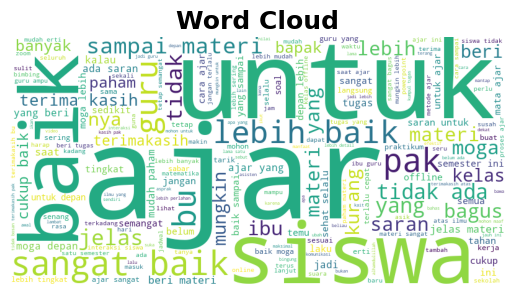

In [30]:
from wordcloud import WordCloud
text_gabung = " ".join(df['Survey'])
wordcloud = WordCloud(
    width= 800,
    height= 400,
    background_color= "white"
).generate(text_gabung)
plt.imshow(wordcloud)
plt.title("Word Cloud", fontsize = 18, fontweight = "bold")
plt.axis("Off")
plt.show()

# Tf-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X = vectorizer.fit_transform(df['Survey'])
y = df['Label']

In [ ]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pk')

# Scatterplot

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)

X_pca = pca.fit_transform(X)
X_pca

array([[ 0.10963644,  0.12321738],
       [ 0.07813465,  0.09999735],
       [-0.02662339,  0.02524871],
       ...,
       [-0.01580632, -0.12220561],
       [-0.06142819,  0.03927664],
       [ 0.16339705,  0.14506025]], shape=(2821, 2))

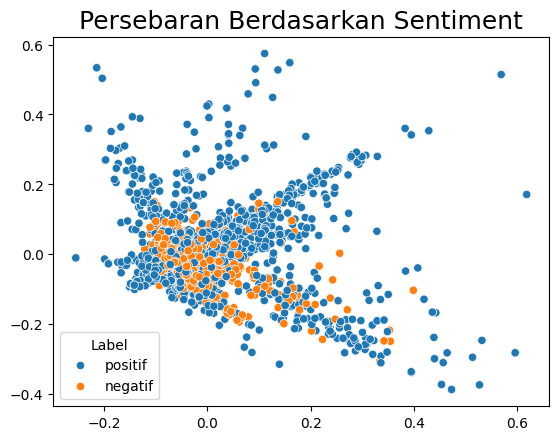

In [33]:
sns.scatterplot(
    x = X_pca[:, 0],
    y = X_pca[:, 1],
    hue = y
)
plt.title("Persebaran Berdasarkan Sentiment", fontsize = 18)
plt.show()

# Imbalance Data

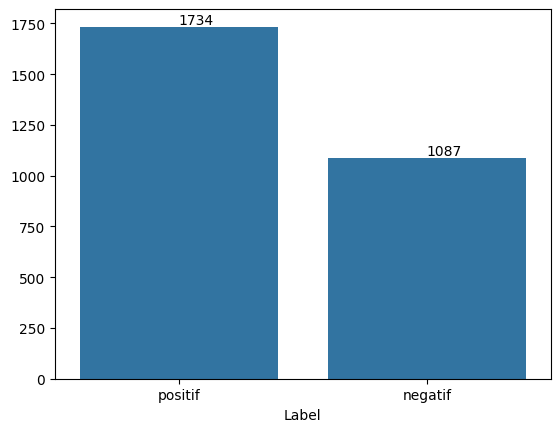

In [34]:
sns.barplot(
    x = df['Label'].value_counts().index,
    y = df['Label'].value_counts().values
)
for i in range(len(df['Label'].value_counts().index)):
    plt.text(i, df['Label'].value_counts().values[i], df['Label'].value_counts().values[i], va = "bottom" )

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# opsional

# SPLIT

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state= 42
)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2256, 10470)
(2256,)
(565, 10470)
(565,)


# Modeling

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
param = {
    "class_weight" : ["balanced"],
    "C" : [0.01,0.1,1,5,10]
}
model_regloc = GridSearchCV(LogisticRegression(), param, cv = 5)
model_regloc.fit(X_train, y_train)

# Score
regloc_train = model_regloc.score(X_train, y_train)
regloc_test = model_regloc.score(X_test, y_test)

print("Score Training set : ", regloc_train)
print("Score Testing set : ", regloc_test)
print("Best Parameter : ", model_regloc.best_params_)
print("Best Estimator : ", model_regloc.best_estimator_)

# regloc_size, train_size, test_size = learning_curve(model_regloc, X_train, y_train, cv = 5)
# train_mean = np.mean(train_size, axis= 1)
# test_mean = np.mean(test_size,  axis = 1)

# plt.plot(regloc_size, train_mean, label = "Training Score")
# plt.plot(regloc_size, test_mean, label = "Testing Score")
# plt.legend()

Score Training set :  0.9791666666666666
Score Testing set :  0.8867256637168142
Best Parameter :  {'C': 5, 'class_weight': 'balanced'}
Best Estimator :  LogisticRegression(C=5, class_weight='balanced')


Accuracy Score : 0.8867256637168142

Classification Report :  
               precision    recall  f1-score   support

     negatif       0.83      0.89      0.86       222
     positif       0.93      0.88      0.90       343

    accuracy                           0.89       565
   macro avg       0.88      0.89      0.88       565
weighted avg       0.89      0.89      0.89       565


F1 SCORE :  [0.86 0.9 ]


<Axes: >

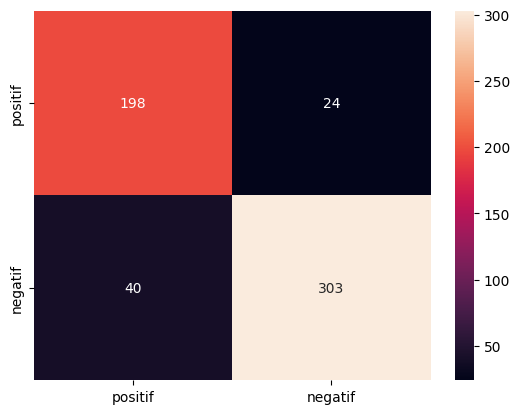

In [40]:
# Evaluasi
y_pred = model_regloc.predict(X_test)
regloc_acc = accuracy_score(y_test, y_pred)
print("Accuracy Score :", regloc_acc)
print()
print("Classification Report : ", "\n", classification_report(y_test, y_pred))
print()
regloc_f1 = f1_score(y_test, y_pred, average= None).round(2)
print("F1 SCORE : ",regloc_f1)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot= True,
    fmt= "d",
    xticklabels= df['Label'].value_counts().index,
    yticklabels= df['Label'].value_counts().index
)



## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
param = {
    "n_neighbors" : [5,7,9,11,13,15,17],
    "weights" : ["uniform", 'distance']
}
model_knn = GridSearchCV(KNeighborsClassifier(), param, cv = 5)
model_knn.fit(X_train, y_train)

# Score
knn_train = model_knn.score(X_train, y_train)
knn_test = model_knn.score(X_test, y_test)

print("Score Training set : ", knn_train)
print("Score Testing set : ", knn_test)
print("Best Parameter : ", model_knn.best_params_)
print("Best Estimator : ", model_knn.best_estimator_)

# knn_size, train_size, test_size = learning_curve(model_knn, X_train, y_train, cv = 5)
# train_mean = np.mean(train_size, axis= 1)
# test_mean = np.mean(test_size,  axis = 1)

# plt.plot(knn_size, train_mean, label = "Training Score")
# plt.plot(knn_size, test_mean, label = "Testing Score")
# plt.legend()

Score Training set :  0.7375886524822695
Score Testing set :  0.6991150442477876
Best Parameter :  {'n_neighbors': 17, 'weights': 'uniform'}
Best Estimator :  KNeighborsClassifier(n_neighbors=17)


Accuracy Score : 0.6991150442477876

Classification Report :  
               precision    recall  f1-score   support

     negatif       0.85      0.28      0.43       222
     positif       0.68      0.97      0.80       343

    accuracy                           0.70       565
   macro avg       0.76      0.63      0.61       565
weighted avg       0.75      0.70      0.65       565


F1 SCORE :  [0.43 0.8 ]


<Axes: >

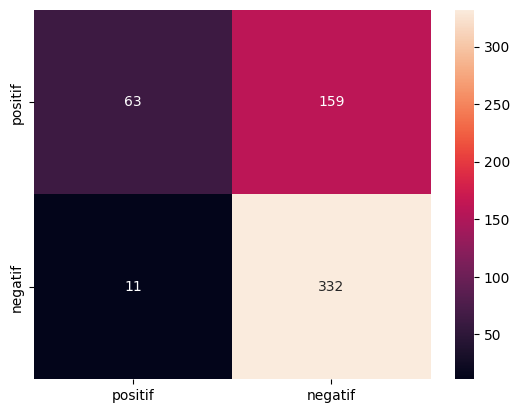

In [42]:
# Evaluasi
y_pred = model_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy Score :", knn_acc)
print()
print("Classification Report : ", "\n", classification_report(y_test, y_pred))
print()
knn_f1 = f1_score(y_test, y_pred, average= None).round(2)
print("F1 SCORE : ",knn_f1)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot= True,
    fmt= "d",
    xticklabels= df['Label'].value_counts().index,
    yticklabels= df['Label'].value_counts().index
)



## Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
param = {
    "alpha" : [0.01, 0.1, 1,5,10],
    'fit_prior' : [True, False]
}
model_nb = GridSearchCV(MultinomialNB(), param, cv = 5)
model_nb.fit(X_train, y_train)

# Score
nb_train = model_nb.score(X_train, y_train)
nb_test = model_nb.score(X_test, y_test)

print("Score Training set : ", nb_train)
print("Score Testing set : ", nb_test)
print("Best Parameter : ", model_nb.best_params_)
print("Best Estimator : ", model_nb.best_estimator_)

# nb_size, train_size, test_size = learning_curve(model_nb, X_train, y_train, cv = 5)
# train_mean = np.mean(train_size, axis= 1)
# test_mean = np.mean(test_size,  axis = 1)

# plt.plot(nb_size, train_mean, label = "Training Score")
# plt.plot(nb_size, test_mean, label = "Testing Score")
# plt.legend()

Score Training set :  0.9849290780141844
Score Testing set :  0.863716814159292
Best Parameter :  {'alpha': 0.01, 'fit_prior': True}
Best Estimator :  MultinomialNB(alpha=0.01)


Accuracy Score : 0.863716814159292

Classification Report :  
               precision    recall  f1-score   support

     negatif       0.80      0.86      0.83       222
     positif       0.91      0.86      0.88       343

    accuracy                           0.86       565
   macro avg       0.86      0.86      0.86       565
weighted avg       0.87      0.86      0.86       565


F1 SCORE :  [0.83 0.88]


<Axes: >

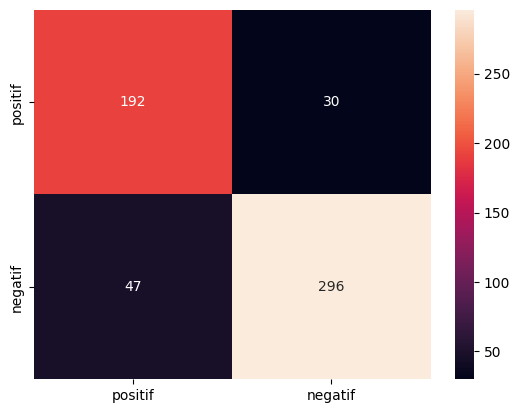

In [44]:
# Evaluasi
y_pred = model_nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy Score :", nb_acc)
print()
print("Classification Report : ", "\n", classification_report(y_test, y_pred))
print()
nb_f1 = f1_score(y_test, y_pred, average= None).round(2)
print("F1 SCORE : ",nb_f1)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot= True,
    fmt= "d",
    xticklabels= df['Label'].value_counts().index,
    yticklabels= df['Label'].value_counts().index
)



## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
param = {
    "class_weight" : ["balanced"],
    "n_estimators" : [200,250,300],
    "max_depth" : [50,60,70,80,90,100]
}
model_rf = GridSearchCV(RandomForestClassifier(), param, cv = 5)
model_rf.fit(X_train, y_train)

# Score
rf_train = model_rf.score(X_train, y_train)
rf_test = model_rf.score(X_test, y_test)

print("Score Training set : ", rf_train)
print("Score Testing set : ", rf_test)
print("Best Parameter : ", model_rf.best_params_)
print("Best Estimator : ", model_rf.best_estimator_)

# rf_size, train_size, test_size = learning_curve(model_rf, X_train, y_train, cv = 5)
# train_mean = np.mean(train_size, axis= 1)
# test_mean = np.mean(test_size,  axis = 1)

# plt.plot(rf_size, train_mean, label = "Training Score")
# plt.plot(rf_size, test_mean, label = "Testing Score")
# plt.legend()

Score Training set :  0.9858156028368794
Score Testing set :  0.8619469026548673
Best Parameter :  {'class_weight': 'balanced', 'max_depth': 50, 'n_estimators': 200}
Best Estimator :  RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=200)


Accuracy Score : 0.8619469026548673

Classification Report :  
               precision    recall  f1-score   support

     negatif       0.82      0.83      0.83       222
     positif       0.89      0.88      0.89       343

    accuracy                           0.86       565
   macro avg       0.85      0.86      0.86       565
weighted avg       0.86      0.86      0.86       565


F1 SCORE :  [0.83 0.89]


<Axes: >

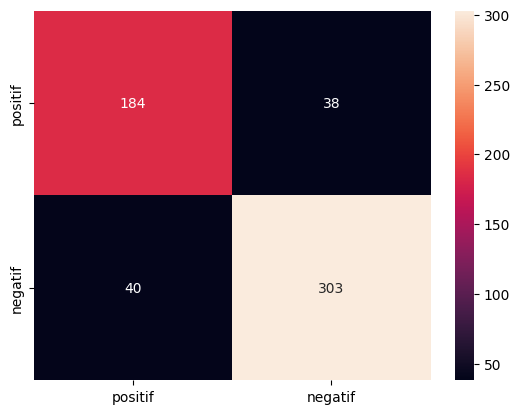

In [46]:
# Evaluasi
y_pred = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy Score :", rf_acc)
print()
print("Classification Report : ", "\n", classification_report(y_test, y_pred))
print()
rf_f1 = f1_score(y_test, y_pred, average= None).round(2)
print("F1 SCORE : ",rf_f1)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot= True,
    fmt= "d",
    xticklabels= df['Label'].value_counts().index,
    yticklabels= df['Label'].value_counts().index
)



## SVC

In [47]:
from sklearn.svm import SVC
param = {
    "class_weight" : ["balanced"],
    "C" : [0.01, 0.1, 1,5,10,100],
    "gamma" : [0.01,0.1,1,5,10]
    
    
}
model_svc = GridSearchCV(SVC(), param, cv = 5)
model_svc.fit(X_train, y_train)

# Score
svc_train = model_svc.score(X_train, y_train)
svc_test = model_svc.score(X_test, y_test)

print("Score Training set : ", svc_train)
print("Score Testing set : ", svc_test)

# svc_size, train_size, test_size = learning_curve(model_svc, X_train, y_train, cv = 5)
# train_mean = np.mean(train_size, axis= 1)
# test_mean = np.mean(test_size,  axis = 1)

# plt.plot(svc_size, train_mean, label = "Training Score")
# plt.plot(svc_size, test_mean, label = "Testing Score")
# plt.legend()

Score Training set :  0.9858156028368794
Score Testing set :  0.879646017699115


Accuracy Score : 0.879646017699115

Classification Report :  
               precision    recall  f1-score   support

     negatif       0.82      0.90      0.85       222
     positif       0.93      0.87      0.90       343

    accuracy                           0.88       565
   macro avg       0.87      0.88      0.88       565
weighted avg       0.88      0.88      0.88       565


F1 SCORE :  [0.85 0.9 ]


<Axes: >

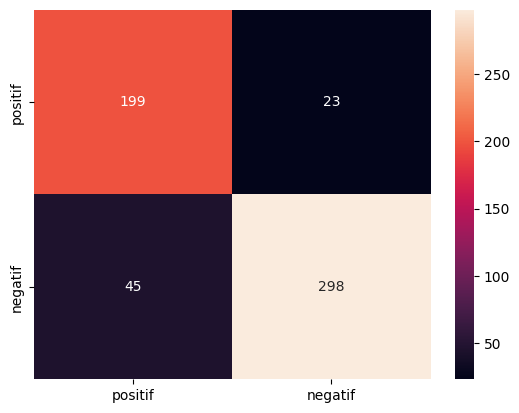

In [48]:
# Evaluasi
y_pred = model_svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy Score :", svc_acc)
print()
print("Classification Report : ", "\n", classification_report(y_test, y_pred))
print()
svc_f1 = f1_score(y_test, y_pred, average= None).round(2)
print("F1 SCORE : ",svc_f1)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot= True,
    fmt= "d",
    xticklabels= df['Label'].value_counts().index,
    yticklabels= df['Label'].value_counts().index
)



# Evaluasi

## Akurasi

In [49]:
accuracy_df = pd.DataFrame({
    "Model" : ["LOGISTIC REGRESSION", "KNN", "NAIVE BAYES", "RANDOM FOREST", "SVC"],
    "Accuracy" : [regloc_acc, knn_acc, nb_acc, rf_acc, svc_acc]
})
accuracy_df

,Model,Accuracy
0,LOGISTIC REGRESSION,0.886726
1,KNN,0.699115
2,NAIVE BAYES,0.863717
3,RANDOM FOREST,0.861947
4,SVC,0.879646


C:\Users\SKOMDA RPS-04\AppData\Local\Temp\ipykernel_42192\2646106960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


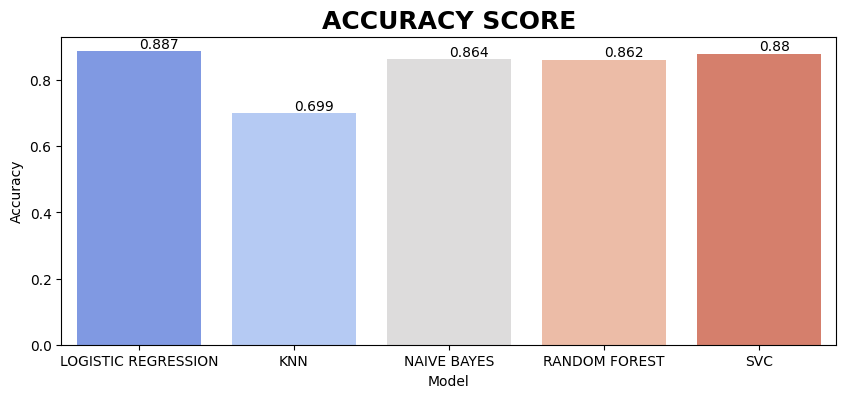

In [50]:
plt.figure(figsize= (10,4))
sns.barplot(
    x = accuracy_df['Model'],
    y = accuracy_df['Accuracy'],
    palette= "coolwarm"
)
for i in range(len(accuracy_df['Model'])):
    plt.text(i, accuracy_df['Accuracy'][i].round(3), accuracy_df['Accuracy'][i].round(3), va = "bottom" )
plt.title("ACCURACY SCORE", fontsize = 18, fontweight = "bold")
plt.show()

## Score

In [51]:
score_df = pd.DataFrame({
    "Model" : ["LOGISTIC REGRESSION", "KNN", "NAIVE BAYES", "RANDOM FOREST", "SVC"],
    "Train" : [regloc_train, knn_train, nb_train, rf_train, svc_train],
    "Test" : [regloc_test, knn_test, nb_test, rf_test, svc_test]
})
score_df

,Model,Train,Test
0,LOGISTIC REGRESSION,0.979167,0.886726
1,KNN,0.737589,0.699115
2,NAIVE BAYES,0.984929,0.863717
3,RANDOM FOREST,0.985816,0.861947
4,SVC,0.985816,0.879646


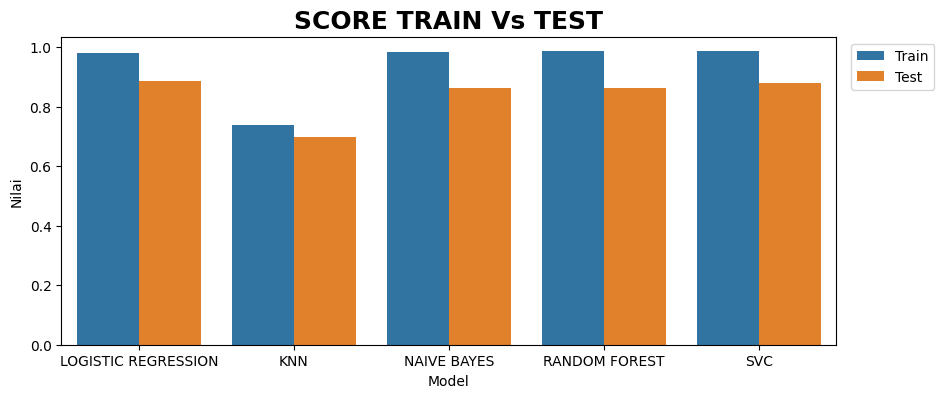

In [52]:
plt.figure(figsize= (10,4))
sns.barplot(
    data = score_df.melt(id_vars="Model", var_name= "Score", value_name= "Nilai"),
    x = "Model",
    y = "Nilai",
    hue = "Score"
)
plt.legend(bbox_to_anchor = (1.01,1))
plt.title("SCORE TRAIN Vs TEST", fontsize = 18, fontweight = "bold")
plt.show()

## F1-Score

In [53]:
f1_df = pd.DataFrame({
    "Model" : ["LOGISTIC REGRESSION", "KNN", "NAIVE BAYES", "RANDOM FOREST", "SVC"],
    "Negatif" : [regloc_f1[0], knn_f1[0], nb_f1[0], rf_f1[0], svc_f1[0]],
    "Positif" : [regloc_f1[1], knn_f1[1], nb_f1[1], rf_f1[1], svc_f1[1]]
})
f1_df

,Model,Negatif,Positif
0,LOGISTIC REGRESSION,0.86,0.90
1,KNN,0.43,0.80
2,NAIVE BAYES,0.83,0.88
3,RANDOM FOREST,0.83,0.89
4,SVC,0.85,0.90


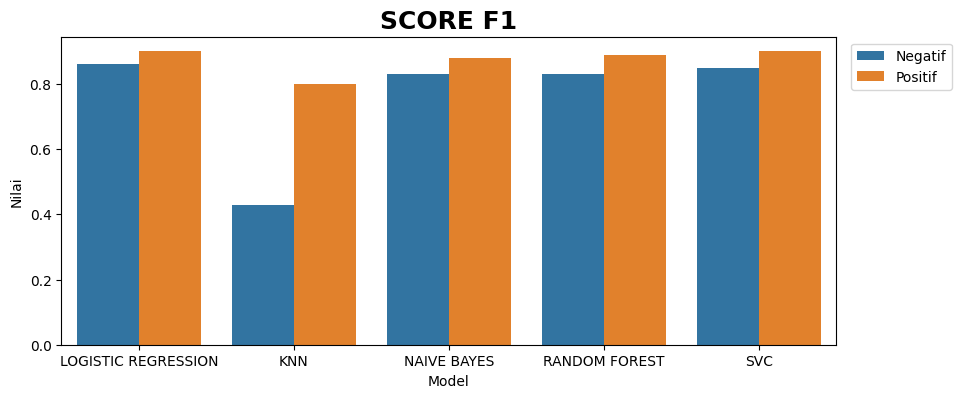

In [54]:
plt.figure(figsize= (10,4))
sns.barplot(
    data = f1_df.melt(id_vars="Model", var_name= "Score", value_name= "Nilai"),
    x = "Model",
    y = "Nilai",
    hue = "Score"
)
plt.legend(bbox_to_anchor = (1.01,1))
plt.title("SCORE F1", fontsize = 18, fontweight = "bold")
plt.show()